In [1]:
import sys
sys.executable


'c:\\Users\\Ras\\Desktop\\home-credit-risk\\.venv\\Scripts\\python.exe'

In [ ]:
#Core libraries 
import pandas as pd
import numpy as np

#Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns 

#Display settings
pd.set_option("display.max_columns", 100)
pd.set_option("display.float_format", "{:.2f}".format)

#plot style
sns.set(style="whitegrid")

In [ ]:
# Loading the dataset
data_path = "../data/application_train.csv"
df = pd.read_csv(data_path)

# Check shape of the data frame
df.shape

(307511, 122)

In [11]:
# I want to preview data

df.info()

df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,...,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,...,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,-19005,-3039,-9833.00,-2437,NaN,1,1,0,1,0,0,Laborers,2.00,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,0.00,2.00,0.00,-617.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,-19932,-3038,-431

In [12]:
#I want to get statical summary 
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,134133.00,306851.00,246546.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,...,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,12.06,1.00,0.82,0.20,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,...,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,11.94,0.00,0.38,0.40,0.04,0.45,0.23,0.91,0.51,0.50,3.27,0.12,0.22,0.20,0.27,0.42,0.38,0.21,0.19,0.19,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.14,0.16,0.08,0.09,0.11,0.05,0.07,0.11,0.08,0.06,0.11,...,0.10,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.15,0.16,0.08,0.09,0.11,0.05,0.07,0.11,2.40,0.45,2.38,0.36,826.81,0.01,0.45,0.01,0.12,0.28,0.01,0.27,0.06,0.00,0.06,0.00,0.06,0.05,0.03,0.10,0.02,0.09,0.02,0.02,0.02,0.08,0.11,0.20,0.92,0.79,1.87
min,100002.00,0.00,0.00,25650.00,45000.00,1615.50,40500.00,0.00,

<function matplotlib.pyplot.show(close=None, block=None)>

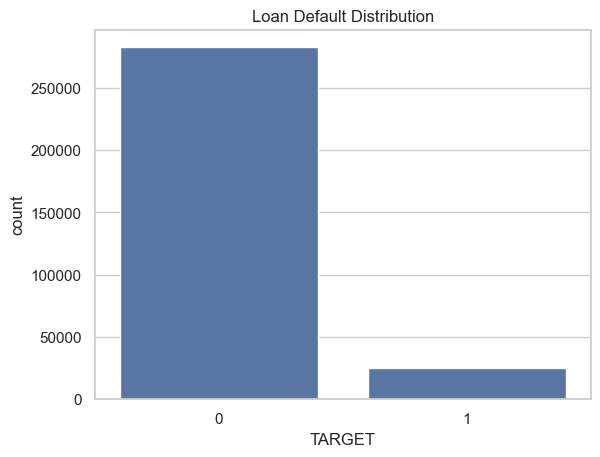

In [14]:
#Target distribution so that i can understand the target variable

df["TARGET"].value_counts(normalize=True)

sns.countplot(x="TARGET", data=df)
plt.title("Loan Default Distribution")
plt.show

### Target Variable Observation

The target variable is highly imbalanced, with a small proportion of applicants defaulting on their loans. 
This reflects real-world credit data, where most approved applicants repay successfully.

Due to this imbalance, accuracy alone would be misleading, and alternative evaluation metrics such as recall and ROC-AUC will be prioritized in later stages.


In [16]:
# Seperating numerical and categorical columns to learn the data more

num_cols = df.select_dtypes(include=["int64", "Float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

len(num_cols), len(cat_cols)

#Insecting just a few names
num_cols[:10], cat_cols[:10]

(Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
        'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
        'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED'],
       dtype='object'),
 Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'],
       dtype='object'))

In [22]:
#Converting application-time sday variable to years

df["AGE_YEARS"] = (-df["DAYS_BIRTH"]) / 365
df["EMPLOYMENT_YEARS"] = (-df["DAYS_EMPLOYED"]) / 365

df[["AGE_YEARS", "EMPLOYMENT_YEARS"]].describe()



,AGE_YEARS,EMPLOYMENT_YEARS
count,307511.00,307511.00
mean,43.94,-174.84
std,11.96,387.06
min,20.52,-1000.67
25%,34.01,0.79
50%,43.15,3.32
75%,53.92,7.56
max,69.12,49.07


In [24]:
#Creating age groups
df["AGE_GROUP"] = pd.cut (
    df["AGE_YEARS"], 
    bins = [20, 30, 40, 50, 60, 70]
)

age_default_rate = df.groupby("AGE_GROUP")["TARGET"].mean()
age_default_rate 

C:\Users\Ras\AppData\Local\Temp\ipykernel_10648\3336600277.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_default_rate = df.groupby("AGE_GROUP")["TARGET"].mean()


AGE_GROUP
(20, 30]   0.11
(30, 40]   0.10
(40, 50]   0.08
(50, 60]   0.06
(60, 70]   0.05
Name: TARGET, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

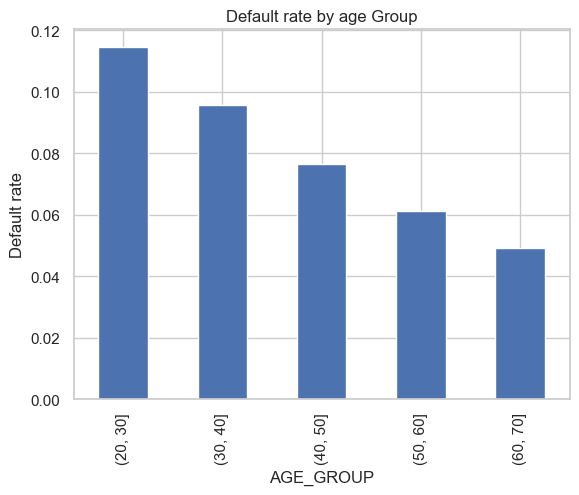

In [26]:
age_default_rate.plot(kind="bar")
plt.ylabel("Default rate")
plt.title("Default rate by age Group")
plt.show

### Age and Default Risk

The analysis indicates that younger applicants exhibit higher default rates, while default risk generally decreases with age. 
This suggests that age may act as a proxy for financial stability and repayment discipline.


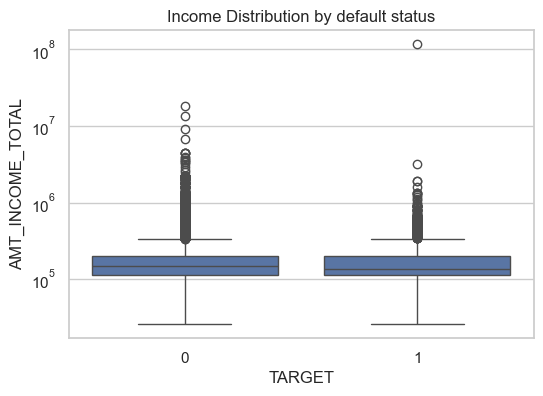

In [27]:
#Does income level reduce default risk ?
plt.figure(figsize=(6,4))
sns.boxplot(x="TARGET", y = "AMT_INCOME_TOTAL", data=df)
plt.yscale("log")
plt.title("Income Distribution by default status")
plt.show()


### Income and Default Risk

Applicants who default generally have lower income levels compared to non-defaulters. However, income alone does not fully capture affordability, 
highlighting the need for relative measures such as credit-to-income ratios.


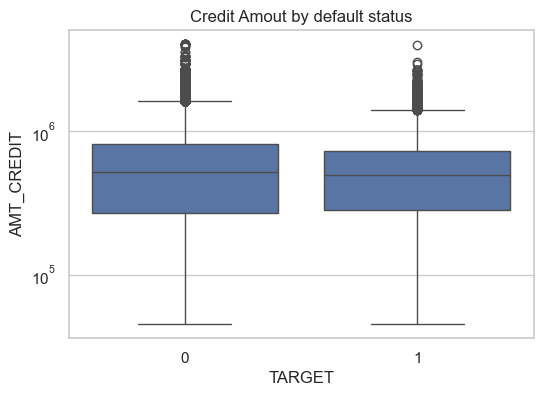

In [28]:
#Are larger loans riskier ?

plt.figure(figsize=(6,4))
sns.boxplot(x="TARGET", y = "AMT_CREDIT", data=df)
plt.yscale("log")
plt.title("Credit Amout by default status")
plt.show()

### Loan Size and Risk Exposure

Applicants who default tend to have higher credit amounts, suggesting that loan size contributes to risk exposure when not properly aligned with income.


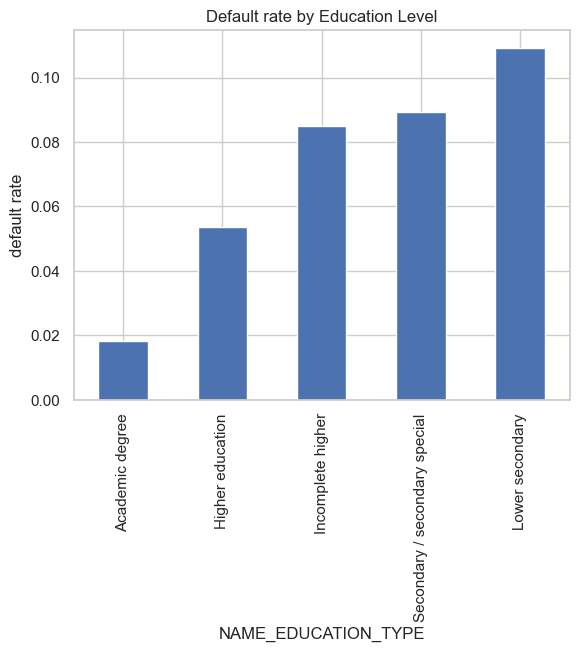

In [30]:
#Does education correlate with repayment behavior?

education_default_rate = (
    df.groupby("NAME_EDUCATION_TYPE")["TARGET"]
    .mean()
    .sort_values()
)

education_default_rate.plot(kind="bar")
plt.ylabel("default rate")
plt.title("Default rate by Education Level")
plt.show()

### Education and Credit Risk

Higher education levels are associated with lower default rates.
Education may act as a proxy for stable employment and income predictability.


In [31]:
#Feature selection

selected_features = [
#Target
"TARGET",

# Demographics
    "AGE_YEARS",
    "CODE_GENDER",
    "NAME_FAMILY_STATUS",
    "NAME_EDUCATION_TYPE",

    # Employment
    "EMPLOYMENT_YEARS",

    # Financial
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",

    # Assets
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY"
]

df_model = df[selected_features].copy()
df_model.head()

,TARGET,AGE_YEARS,CODE_GENDER,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,EMPLOYMENT_YEARS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,1,25.92,M,Single / not married,Secondary / secondary special,1.75,202500.00,406597.50,24700.50,N,Y
1,0,45.93,F,Married,Higher education,3.25,270000.00,1293502.50,35698.50,N,N
2,0,52.18,M,Single / not married,Secondary / secondary special,0.62,67500.00,135000.00,6750.00,Y,Y
3,0,52.07,F,Civil marriage,Secondary / secondary special,8.33,135000.00,312682.50,29686.50,N,Y
4,0,54.61,M,Single / not married,Secondary / secondary special,8.32,121500.00,513000.00,21865.50,N,Y


In [32]:
#Checking for missing values

df_model.isnull().mean().sort_values(ascending=False)

AMT_ANNUITY           0.00
AGE_YEARS             0.00
TARGET                0.00
CODE_GENDER           0.00
NAME_FAMILY_STATUS    0.00
EMPLOYMENT_YEARS      0.00
NAME_EDUCATION_TYPE   0.00
AMT_INCOME_TOTAL      0.00
AMT_CREDIT            0.00
FLAG_OWN_CAR          0.00
FLAG_OWN_REALTY       0.00
dtype: float64

In [33]:
# Feature engineering: affordability ratios
df_model["CREDIT_INCOME_RATIO"] = df_model["AMT_CREDIT"] / df_model["AMT_INCOME_TOTAL"]
df_model["ANNUITY_INCOME_RATIO"] = df_model["AMT_ANNUITY"] / df_model["AMT_INCOME_TOTAL"]

# Conducting just a quick sanity check
df_model[["CREDIT_INCOME_RATIO", "ANNUITY_INCOME_RATIO"]].describe()


,CREDIT_INCOME_RATIO,ANNUITY_INCOME_RATIO
count,307511.00,307499.00
mean,3.96,0.18
std,2.69,0.09
min,0.00,0.00
25%,2.02,0.11
50%,3.27,0.16
75%,5.16,0.23
max,84.74,1.88


In [ ]:
#Encoding categorical variables(uhm, because it's a safe thing to do for models to learn well)

#Seperate features and target
x = df_model.drop("TARGET", axis=1)
y = df_model["TARGET"]

#One-hot encode categorical variables
X_encoded = pd.get_dummies(x, drop_first=True)

#Checking results
X_encoded.shape, X_encoded.head()

((307511, 20),
    AGE_YEARS  EMPLOYMENT_YEARS  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
 0      25.92              1.75         202500.00   406597.50     24700.50   
 1      45.93              3.25         270000.00  1293502.50     35698.50   
 2      52.18              0.62          67500.00   135000.00      6750.00   
 3      52.07              8.33         135000.00   312682.50     29686.50   
 4      54.61              8.32         121500.00   513000.00     21865.50   
 
    CREDIT_INCOME_RATIO  ANNUITY_INCOME_RATIO  CODE_GENDER_M  CODE_GENDER_XNA  \
 0                 2.01                  0.12           True            False   
 1                 4.79                  0.13          False            False   
 2                 2.00                  0.10           True            False   
 3                 2.32                  0.22          False            False   
 4                 4.22                  0.18           True            False   
 
    NAME_FAMILY_STATUS_Marr

In [35]:
#Train/Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

X_train.shape, X_test.shape, y_train.mean(), y_test.mean()


((246008, 20),
 (61503, 20),
 np.float64(0.08072908198107379),
 np.float64(0.08072776937710356))

In [36]:
#Scaling before training 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((246008, 20), (61503, 20))

In [40]:
#Model Training 

from sklearn.linear_model import LogisticRegression

#Initialising logistic regression 

log_reg = LogisticRegression(
    max_iter = 1000,
    class_weight = "balanced",
    random_state = 42
)

#Actual trainig
log_reg.fit(X_train_scaled, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [41]:
import numpy as np

np.isnan(X_train_scaled).sum(), np.isnan(X_test_scaled).sum()


(np.int64(20), np.int64(4))

### Data Validation & Cleanup After Feature Engineering

During model training, missing values were detected after feature engineering.  
This section re-validates and cleans the dataset to ensure the final model input contains no NaN or infinite values.


In [42]:
# Safety cleanup after feature engineering
import numpy as np

df_model.replace([np.inf, -np.inf], np.nan, inplace=True)


In [44]:
# Re-handling missing values after feature engineering
num_features = df_model.select_dtypes(include=["float64", "int64"]).columns
cat_features = df_model.select_dtypes(include=["object"]).columns

for col in num_features:
    df_model[col] = df_model[col].fillna(df_model[col].median())

for col in cat_features:
    df_model[col] = df_model[col].fillna("Unknown")

# Final verification
df_model.isnull().sum().max()


np.int64(0)

In [45]:
# Rebuilding model inputs after cleanup
X = df_model.drop("TARGET", axis=1)
y = df_model["TARGET"]

X_encoded = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import numpy as np
np.isnan(X_train_scaled).sum(), np.isnan(X_test_scaled).sum()


(np.int64(0), np.int64(0))

In [46]:
#Retraining the model 

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

log_reg.fit(X_train_scaled, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [47]:
# Predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]


## Model Evaluation

In this section, the performance of the credit risk model is evaluated to understand how well it can identify applicants who are likely to default. Because most applicants repay their loans, using accuracy alone would give a misleading picture of model performance.

Instead, evaluation focuses on metrics such as ROC-AUC, recall, precision, and the confusion matrix. These metrics provide better insight into how effectively the model separates high-risk applicants from low-risk ones.

Greater emphasis is placed on recall for defaulters, since approving a high-risk applicant can result in financial loss for the lender. The evaluation therefore aims to assess whether the model can meaningfully support credit decision-making rather than simply produce high overall accuracy.


In [48]:
from sklearn.metrics import accuracy_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

accuracy, roc_auc

(0.5982960180804189, 0.6288020102655694)

In [49]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[33888, 22650],
       [ 2056,  2909]])

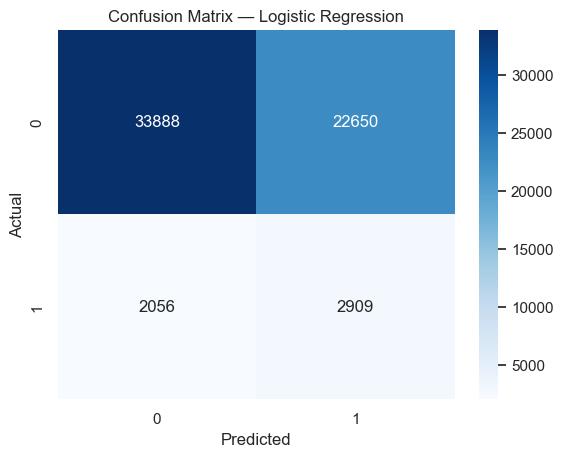

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Logistic Regression")
plt.show()

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.60      0.73     56538
           1       0.11      0.59      0.19      4965

    accuracy                           0.60     61503
   macro avg       0.53      0.59      0.46     61503
weighted avg       0.88      0.60      0.69     61503



### Model Performance Interpretation

The logistic regression model shows reasonable discriminatory ability. Recall for defaulters is prioritised, as failing to identify high-risk applicants poses a greater financial risk than rejecting some low-risk applicants.


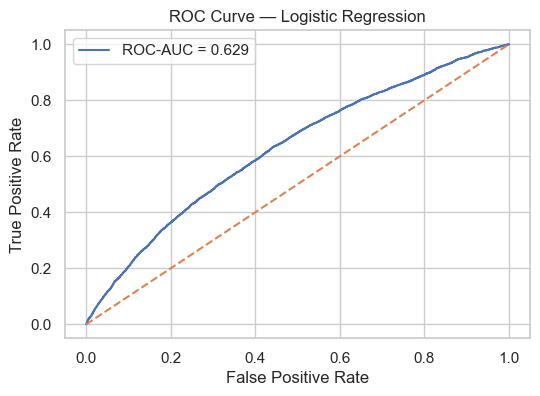

In [52]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression")
plt.legend()
plt.show()


In [55]:
#Interpret coefficients

import pandas as pd

coefficients = pd.DataFrame({
    "Feature": X_encoded.columns,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coefficients.head(10)




,Feature,Coefficient
17,NAME_EDUCATION_TYPE_Secondary / secondary special,0.75
14,NAME_EDUCATION_TYPE_Higher education,0.48
15,NAME_EDUCATION_TYPE_Incomplete higher,0.25
7,CODE_GENDER_M,0.22
16,NAME_EDUCATION_TYPE_Lower secondary,0.21
6,ANNUITY_INCOME_RATIO,0.14
2,AMT_INCOME_TOTAL,0.08
1,EMPLOYMENT_YEARS,0.03
19,FLAG_OWN_REALTY_Y,0.02
5,CREDIT_INCOME_RATIO,0.01


In [56]:
coefficients.tail(10)


,Feature,Coefficient
10,NAME_FAMILY_STATUS_Separated,-0.02
4,AMT_ANNUITY,-0.02
13,NAME_FAMILY_STATUS_Widow,-0.02
11,NAME_FAMILY_STATUS_Single / not married,-0.03
8,CODE_GENDER_XNA,-0.08
12,NAME_FAMILY_STATUS_Unknown,-0.08
3,AMT_CREDIT,-0.11
9,NAME_FAMILY_STATUS_Married,-0.12
18,FLAG_OWN_CAR_Y,-0.14
0,AGE_YEARS,-0.30


### Key Risk Drivers

Affordability-related features, such as credit-to-income and annuity-to-income ratios, are among the strongest drivers of default risk.
Indicators of financial stability, such as asset ownership, are associated with lower risk.


## Modeling Approach

In this stage, a predictive model is trained to estimate the likelihood that a loan applicant will default. The goal is not only to make predictions, but to understand whether the available application data can meaningfully support credit risk assessment.

The modeling process begins with a baseline logistic regression model. Logistic regression is commonly used in credit risk modeling because it is interpretable, stable, and suitable for regulated environments. It allows direct understanding of how individual features influence default risk.

After establishing a baseline, a more flexible tree-based model is introduced to explore whether non-linear relationships and feature interactions can improve performance. Comparing these models helps evaluate the trade-off between predictive power and interpretability.

Throughout this process, the focus remains on risk-aware evaluation rather than maximizing accuracy. The models are assessed based on their ability to identify high-risk applicants and support informed lending decisions.


In [62]:
import pandas as pd

rf_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

rf_importance.head(10)


,Feature,Importance
0,AGE_YEARS,0.21
1,EMPLOYMENT_YEARS,0.17
3,AMT_CREDIT,0.11
4,AMT_ANNUITY,0.08
5,CREDIT_INCOME_RATIO,0.07
7,CODE_GENDER_M,0.07
14,NAME_EDUCATION_TYPE_Higher education,0.07
6,ANNUITY_INCOME_RATIO,0.07
2,AMT_INCOME_TOTAL,0.04
17,NAME_EDUCATION_TYPE_Secondary / secondary special,0.04


In [61]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=50,
    random_state=42,
    class_weight="balanced"
)

rf_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",50
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

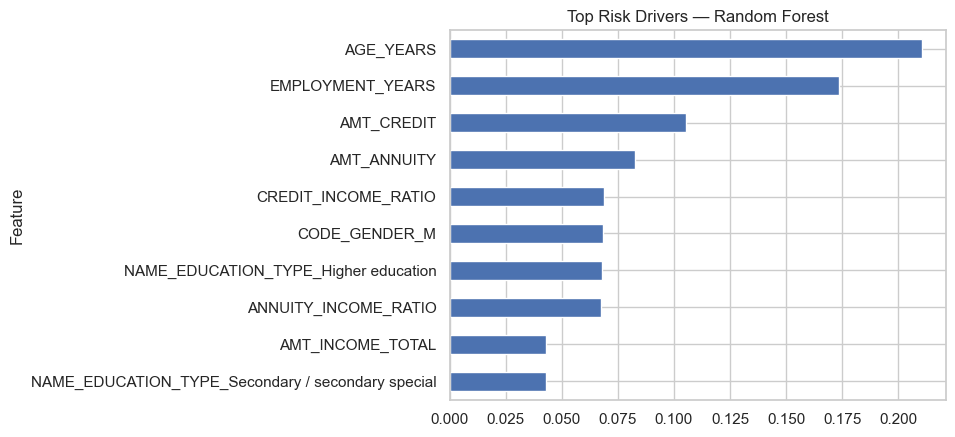

In [63]:
rf_importance.head(10).plot(
    kind="barh",
    x="Feature",
    y="Importance",
    legend=False
)
plt.title("Top Risk Drivers — Random Forest")
plt.gca().invert_yaxis()
plt.show()


### Explainability and Risk Drivers

Logistic regression coefficients provide clear directional insight into how features influence default risk.
 Affordability-related ratios increase default likelihood, while indicators of financial stability reduce risk. 
 This level of transparency is essential for supporting accountable credit decision-making.


### Individual Risk Interpretation

In practice, individual applicant risk scores can be explained by examining contributing features such as income,
 loan size, and repayment burden. This allows credit officers to understand not only whether an applicant is risky, but why the model produced that assessment.
